# Работа 1.2.3 Определение моментов инерции твердых тел с помощью трифилярного подвеса.


---
---

## Цель работы и оборудование
---


### Цель

измерение момента инерции ряда тел и сравнение результатов с расчетами по теоретическим формулам;    
проверка аддитивности моментов инерции и справедливости формулы Гюйгенса-Штейнера.

### Оборудование

трифилярный подвес,   
секундомер,    
счетчик числа колебаний,    
набор тел, момент инерции которых надо измерить (диск стержень, полый цилиндр и др.)

## Теория
---

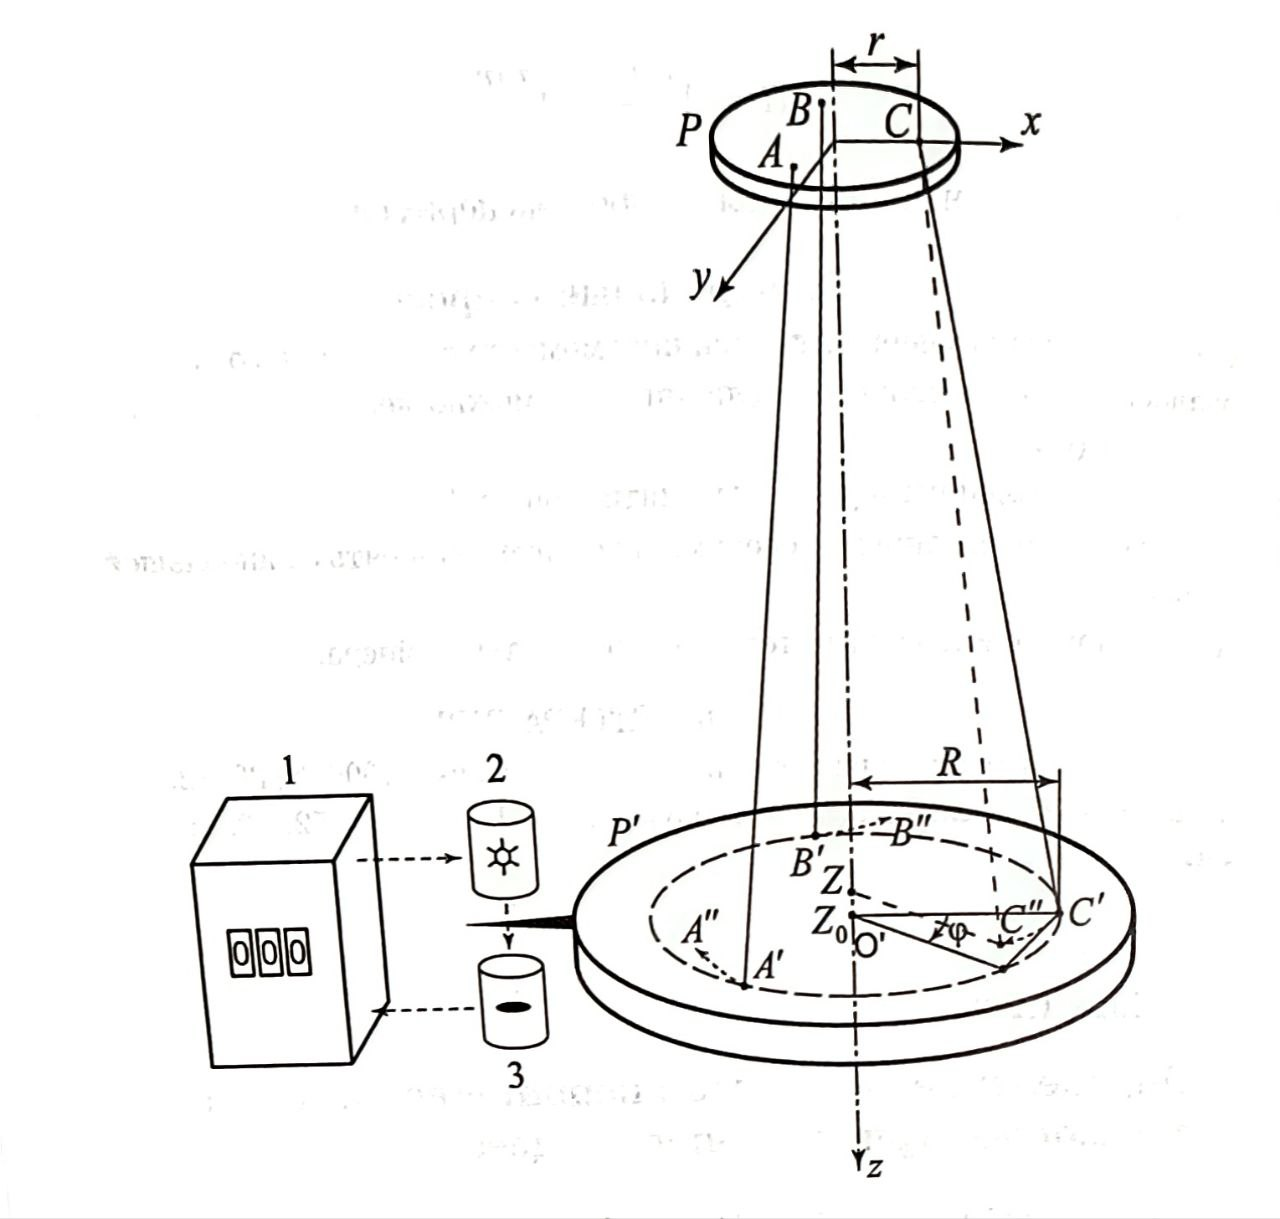

Имеют место крутильные колебания. Здесь учитывается подъем тела при повороте нитей
$$ \frac{I \dot{ \varphi^{2}}}{2} + mg(z_{0} - z) = E$$

Высота подъема 
$$ z \approx z_{0} - \frac{Rr \varphi^{2}}{2z_{0}} $$

В итоге
$$ \frac{I \dot{ \varphi^{2}}}{2} + mg\frac{Rr}{2z_{0}}\varphi^{2} = E $$

$$ I \ddot{\varphi} + mg \frac{Rr}{z_{0}}\varphi = 0 $$

Уравнение колебаний дает решение

$$ \varphi = \varphi_{0} \sin({\sqrt{\frac{mgRr}{Iz_{0}}} + \theta_{0}})$$

Период 
$$ T = 2\pi\sqrt{\frac{Iz_{0}}{mgRr}} $$

$$ I = \frac{mgRrT^{2}}{4\pi^{2}z_{0}} = k m T^{2}$$
$$ k = \frac{gRr}{4\pi^{2}z_{0}} $$

$k$ постоянна для установки

## Ход работы 
---


### Параметры установки

Установка 6

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import math


Измерим $ z_0 $    
Длина нити $ L = 2 ~м 14 ~см $    
$z_0$ вычисляется по теореме пифагора

In [196]:
L = 2.140 # м


Измерим $ z_{0} $, $R$, $r$. По ним вычислим $k$ 

$$ k = \frac{gRr}{4\pi^{2}z_{0}} $$

In [197]:
R   = 0.1146 # м
r   = 0.0305  # м
z_0 = math.sqrt(L**2 - R**2)

k   = 9.81 * R * r / (4 * math.pi**2 * z_0)
z_0, R, r, k


(2.1369293015914215, 0.1146, 0.0305, 0.00040644667349993267)

Погрешность $k$

$$ \sigma_{k} = \frac{g}{4\pi^{2}} \sqrt{(\frac{\sigma_{R}r}{z_{0}})^{2} + (\frac{\sigma_{r}R}{z_{0}})^{2} + (\frac{Rr\sigma_{z}}{2z_{0}})^{2}} $$

In [198]:
sigma_r = 0.0003 # м
sigma_R = 0.0005 # м
sigma_L = 0.005  # м

sigma_z = math.sqrt(4 * L**2 * sigma_L**2 + 4 * R**2 * sigma_R**2) #
sigma_z


0.021400306847332823

In [199]:
sigma_k = 9.81 / (4 * math.pi**2) * math.sqrt((sigma_R * r/ z_0)**2 +
                                              (sigma_r * R/ z_0)**2 +
                                              (R*r*sigma_z/(2 * z_0))**2)
sigma_k


6.16778311899462e-06

$$ k = 4.059 * 10^{-5} \pm 0.187 * 10^{-5} $$

### Момент инерции ненагруженной платформы

In [200]:
m = 1.0125 # кг
sigma_m = 0.0005 # кг

t = 132.406 # с
n = 30
T_no_mass_1 = t / n # период ненагруженной платформы

t = 131.344
n = 30
T_no_mass_2 = t / n

t = 91.96
n = 21
T_no_mass_3 = t / n


T_no_mass = np.mean([T_no_mass_1, T_no_mass_2, T_no_mass_3])
sigma_T_no_mass = np.std([T_no_mass_1, T_no_mass_2, T_no_mass_3]) / math.sqrt(3)
T_no_mass, sigma_T_no_mass


(4.390238095238096, 0.009512682388699385)

Период вычислили как среднее по 3 экспериментам, погрешность - как для случайной величины

In [201]:
I_no_mass = k * m * T_no_mass**2
I_no_mass


0.007931854759324059

In [202]:
sigma_I_no_mass = math.sqrt((m * T_no_mass**2 * sigma_k) ** 2 +
                            (k * T_no_mass**2 * sigma_m) ** 2 +
                            (2 * k * m * T_no_mass * sigma_T_no_mass) ** 2)

eps_I_no_mass = sigma_I_no_mass / I_no_mass
sigma_I_no_mass, eps_I_no_mass


(0.0001252381519200171, 0.015789264392769807)

$$ I = 792.059 * 10^{-6} \pm !!!!!!!!!!!!!!!!!!!!! $$

### Измерение моментов инерции двух тел.

In [203]:
def CalcISigmaI(k, m, T, sigma_k, sigma_m, sigma_T):
    I = k * m * T**2 - I_no_mass

    sigma_I_no_mass = math.sqrt((m * T**2 * sigma_k) ** 2 +
                                (k * T**2 * sigma_m) ** 2 +
                                (2 * k * m * T * sigma_T) ** 2)

    return I, sigma_I_no_mass


In [204]:
m_cyl = 0.7772 # кг
m_dsc = 0.8813 # кг
m_stk = 1.2060 # кг


### Цилинд

In [205]:
t_cyl = 125.044
n     = 30
T_cyl_1 = t_cyl / n

t_cyl = 58.342
n     = 14
T_cyl_2 = t_cyl / n

t_cyl = 75.063
n     = 18
T_cyl_3 = t_cyl / n


T_cyl = np.mean([T_cyl_1, T_cyl_2, T_cyl_3])
sigma_T_cyl = np.std([T_cyl_1, T_cyl_2, T_cyl_3]) / math.sqrt(3)
T_cyl, sigma_T_cyl


(4.168528571428571, 0.0006979543950837292)

In [206]:
I_cyl, sigma_I_cyl = CalcISigmaI(k, m_cyl + m, T_cyl, sigma_k, sigma_m, sigma_T_cyl)
I_cyl, sigma_T_cyl


(0.004708212260218683, 0.0006979543950837292)

In [207]:
d_cyl = 0.1595
r_cyl = d_cyl / 2
I_cyl_theory = m_cyl * r_cyl**2
I_cyl_theory


0.004943040575

In [208]:
delta_I_cyl = abs(I_cyl_theory - I_cyl)
delta_I_cyl


0.00023482831478131676

### Диск

In [209]:
t_dsc = 74.626
n     = 20
T_dsc_1 = t_dsc / n

t_dsc = 85.710
n     = 23
T_dsc_2 = t_dsc / n

t_dsc = 81.853
n     = 22
T_dsc_3 = t_dsc / n


T_dsc = np.mean([T_dsc_1, T_dsc_2, T_dsc_3])
sigma_T_dsc = np.std([T_dsc_1, T_dsc_2, T_dsc_3]) / math.sqrt(3)
T_dsc, sigma_T_dsc


(3.7261375494071145, 0.0025290252110875384)

In [210]:
I_dsc, sigma_I_dsc = CalcISigmaI(k, m_dsc + m, T_dsc, sigma_k, sigma_m, sigma_T_dsc)

I_dsc, sigma_I_dsc


(0.0027551364252805, 0.00016284591342715008)

In [211]:
d_dsc = 0.1604
r_dsc = d_dsc / 2
I_dsc_theory = m_dsc * r_dsc**2 / 2

I_dsc_theory


0.0028342784259999996

### Проверка аддитивности

In [212]:
t_dsc_cyl = 120.837
n         = 32
T_dsc_cyl_1 = t_dsc_cyl / n

t_dsc_cyl = 45.391
n         = 12
T_dsc_cyl_2 = t_dsc_cyl / n

t_dsc_cyl = 41.548
n         = 11
T_dsc_cyl_3 = t_dsc_cyl / n


T_dsc_cyl = np.mean([T_dsc_cyl_1, T_dsc_cyl_2, T_dsc_cyl_3])
sigma_T_dsc_cyl = np.std([T_dsc_cyl_1, T_dsc_cyl_2, T_dsc_cyl_3]) / math.sqrt(3)
T_dsc_cyl, sigma_T_dsc_cyl


(3.778610164141414, 0.0016369315450810076)

In [213]:
I_dsc_cyl, sigma_I_dsc_cyl = CalcISigmaI(k, m_cyl + m_dsc + m, T_dsc_cyl, sigma_k, sigma_m, sigma_T_dsc_cyl)

I_dsc_cyl, sigma_I_dsc_cyl


(0.0075685000126568865, 0.0002356171088926855)

In [220]:
delta_I_sum = abs(I_dsc + I_cyl - I_dsc_cyl)

delta_I_sum


0.00010515132715770321

### Диск, разрезанный по диаметру

In [ ]:
m1 = 0.7095
m2 = 0.707


In [ ]:
h = 0
t_2dsc = 140.135
n      = 45
T_2dsc_1 = t_2dsc / n

T_2dsc_1

I_2dsc_1 = CalcISigmaI(k, m + m1 + m2, T_2dsc_1, sigma_k, sigma_m, 0)


In [ ]:
h = 0.8 / 2 * 0.01
t_2dsc = 53
n      = 17
T_2dsc_2 = t_2dsc / n

T_2dsc_2

I_2dsc_2 =


In [ ]:
h = 2.8 / 2 * 0.01
t_2dsc = 47.405
n      = 15
T_2dsc_3 = t_2dsc / n

T_2dsc_3

I_2dsc_3 =


In [ ]:
h = 3.1 / 2 * 0.01
t_2dsc = 41.326
n      = 13
T_2dsc_4 = t_2dsc / n

T_2dsc_4

I_2dsc_4 =


In [ ]:
h = 4 / 2 * 0.01
t_2dsc = 51.339
n      = 16
T_2dsc_5 = t_2dsc / n

T_2dsc_5

I_2dsc_5 =


In [ ]:
h = 5.9 / 2 * 0.01
t_2dsc = 42.962
n      = 13
T_2dsc_6 = t_2dsc / n

T_2dsc_6

I_2dsc_6 =


In [ ]:
h = 6.9 / 2 * 0.01
t_2dsc = 43.965
n      = 13
T_2dsc_7 = t_2dsc / n

T_2dsc_7

I_2dsc_7 =


In [ ]:
h = 7.9 / 2 * 0.01
t_2dsc = 45.151
n      = 13
T_2dsc_8 = t_2dsc / n

T_2dsc_8

I_2dsc_8 =


In [215]:
I_disc = [0, 0, 0, 0, 0, 0, 0, 0, 0]
h      = [0, 0.004, 0.014, 0.0155, 0.02, 0.0295, 0.0345, 0, 0]
h_sqr  = [h**2 for h in h]
h_sqr


[0, 0, 0, 0, 0, 0, 0, 0]

$$ \sigma_{h^{2}} = 2 h \sigma_{h} $$

In [216]:
sigma_h_sqr = [2 * h * sigma_r for h in h]
sigma_h_sqr


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

$$ \sigma_{I} =  $$

In [217]:
sigma_I_disc = 0


In [218]:
v = h_sqr
u = I_disc

mu = np.mean(u) # средее
mv = np.mean(v)
mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
mu2 = np.mean([u_i**2 for u_i in u])
muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
k = (muv - mu * mv) / (mv2 - mv**2)
b = mu - k * mv
print("k = ", k, ", b = ", b)


k =  nan , b =  nan


C:\Users\user\AppData\Local\Temp\ipykernel_12324\3302864944.py:9: RuntimeWarning: invalid value encountered in double_scalars
  k = (muv - mu * mv) / (mv2 - mv**2)


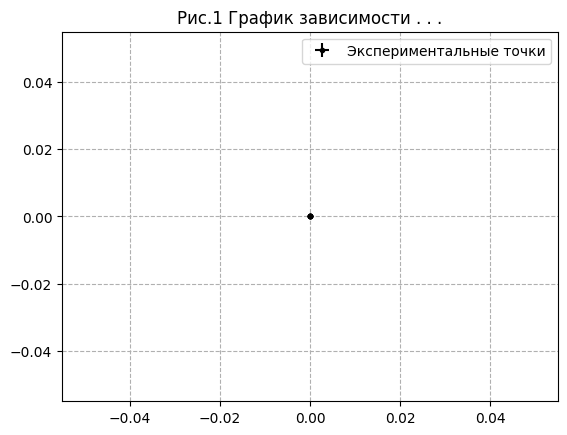

In [219]:
plt.figure()
plt.ylabel("")
plt.xlabel("")
plt.title('Рис.1 График зависимости . . .')
plt.grid(True, linestyle = '--')
plt.errorbar(h_sqr, I_disc, xerr=sigma_h_sqr, yerr = sigma_I_disc, fmt = ".k", label = "Экспериментальные точки")
x = np.array([min(h_sqr), max(h_sqr)])
plt.plot(x, k*x + b, "-r", linewidth = 1)
plt.legend()
